
# Generic Workflow

This shows an example workflow with vapor.
We begin by creating a session and opening a dataset.
You can have multiple sessions open at the same time.


In [1]:
import example_utils
from vapor import session, renderer, dataset, camera

Vapor 3.9.3
Python 3.9.19 (/opt/anaconda3/envs/vapor)
OpenGL 4.1 Metal - 83.1


In [2]:
ses = session.Session()
data = example_utils.OpenExampleDataset(ses)


## Dump the dataset metadata


In [3]:
print("Time Coordinate Variable Name:", data.GetTimeCoordVarName())
print("Coordinate Variable Names:", data.GetCoordVarNames())

print("Dimensions:")
for dim in data.GetDimensionNames():
    print(f"  {dim}:", data.GetDimensionLength(dim, 0))

print("Data Variables:")
for var in data.GetDataVarNames():
    print(f"  {var}")
    print(f"    Time Varying:", bool(data.IsTimeVarying(var)))
    print(f"    Dimensionality:", data.GetVarGeometryDim(var))
    print(f"    Coordinates:", data.GetVarCoordVars(var, True))
    print("     Data Range:", data.GetDataRange(var))

Time Coordinate Variable Name: 
Coordinate Variable Names: ['__regCoord_64_x', '__regCoord_64_y', '__regCoord_64_z']
Dimensions:
  __regDim_64: 64
Data Variables:
  U10
    Time Varying: False
    Dimensionality: 2
    Coordinates: ['__regCoord_64_x', '__regCoord_64_y']
     Data Range: [-1.9993805885314941, 1.9994730949401855]
  V10
    Time Varying: False
    Dimensionality: 2
    Coordinates: ['__regCoord_64_x', '__regCoord_64_y']
     Data Range: [-0.2711198925971985, 0.2711198925971985]
  V
    Time Varying: False
    Dimensionality: 3
    Coordinates: ['__regCoord_64_x', '__regCoord_64_y', '__regCoord_64_z']
     Data Range: [-0.3319709300994873, 0.3319709300994873]



## Render the first 2D variable as a pseudocolor


Rendering 2D variable U10


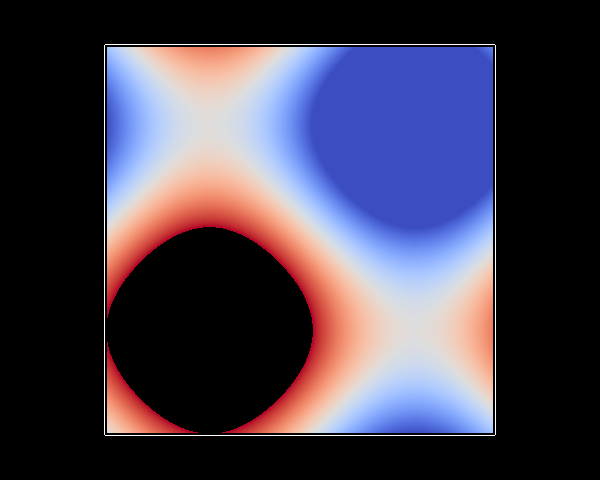

In [4]:
first_2d_var = data.GetDataVarNames(2)[0]
print(f"Rendering 2D variable {first_2d_var}")

ren = data.NewRenderer(renderer.TwoDDataRenderer)
ren.SetVariableName(first_2d_var)
ren.GetPrimaryTransferFunction().SetMinMapValue(-1)
ren.GetPrimaryTransferFunction().SetMaxMapValue(1)

ses.GetCamera().ViewAll()
ses.Show()

ses.DeleteRenderer(ren)


## Render U10 and V10 as barbs over a map


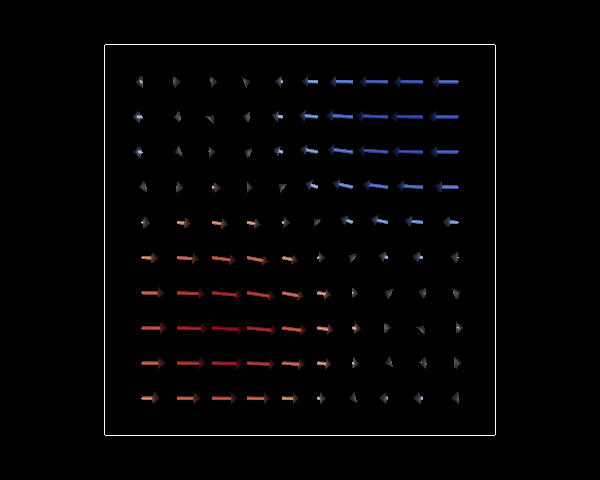

In [5]:
# If your dataset is geo-referenced, this will automatically render a geographically correct map.
# map_ren = data.NewRenderer(renderer.ImageRenderer)

barbs = data.NewRenderer(renderer.BarbRenderer)
barbs.SetDimensions(2)
barbs.SetFieldVariableNames(['U10', 'V10'])
barbs.SetLineThickness(2)

ses.Show()
ses.DeleteRenderer(barbs)


## Simulate and render a flow advection


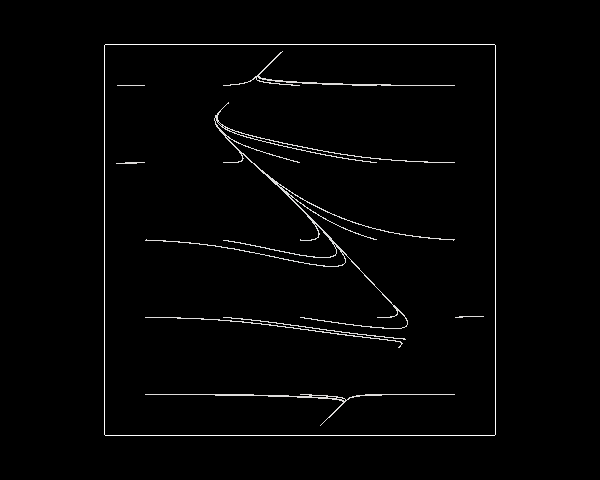

In [6]:
flow = data.NewRenderer(renderer.FlowRenderer)
flow.SetFieldVariableNames(['U10', 'V10'])

ses.Show()

ses.DeleteRenderer(flow)


## Volume render a 3D variable


UNSUPPORTED (log once): POSSIBLE ISSUE: unit 3 GLD_TEXTURE_INDEX_3D is unloadable and bound to sampler type (Float) - using zero texture because texture unloadable


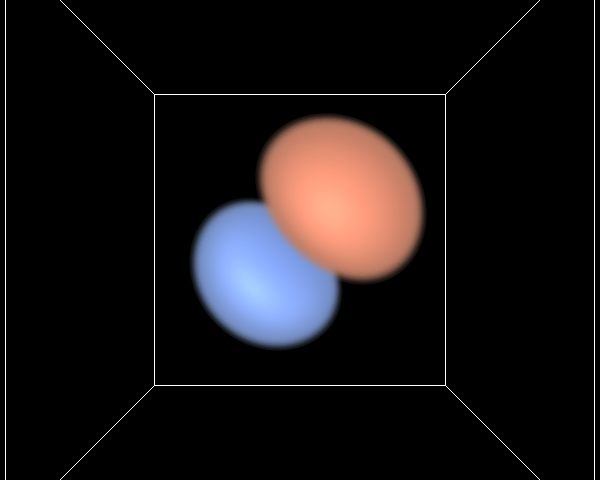

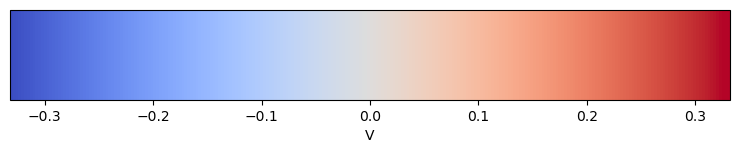

In [7]:
volume = data.NewRenderer(renderer.VolumeRenderer)
volume.SetVariableName("V")

tf = volume.GetPrimaryTransferFunction()
tf.SetOpacityList([1, 0, 0, 1])

ses.GetCamera().ViewAll()
ses.Show()

# Show a colorbar for the volume rendering
tf.ShowMatPlotLibColorbar(label="V")


## Scale the dataset Z axis

Vapor will automatically scale the Z axis of a dataset to produce reasonable results.
This can be manually adjusted as shown below.


Default dataset scaling = [1.0, 1.0, 1.0]
New dataset scaling = [1.0, 1.0, 0.3]


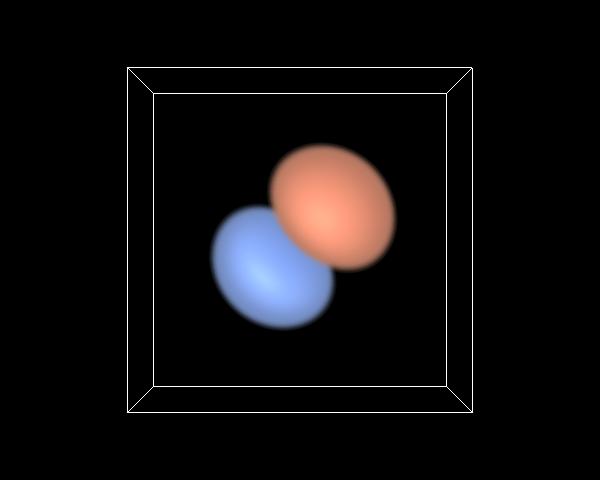

In [8]:
scales = data.GetTransform().GetScales()
print("Default dataset scaling =", scales);
scales[2] *= 0.3
data.GetTransform().SetScales(scales)
print("New dataset scaling =", data.GetTransform().GetScales());
ses.Show()


## Add axis annotations to the rendering


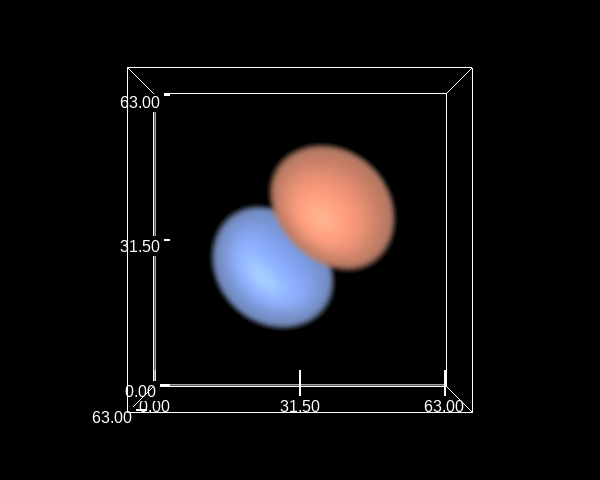

In [9]:
annotations = ses.GetAxisAnnotations()
annotations.SetAxisAnnotationEnabled(True)
ses.Show()


## Export the session for use in the Vapor GUI application

Sessions created in Python can be saved as a .vs3 file.
These files can then be opened in the Vapor GUI application and explored interactively.
Conversely, sessions created in the Vapor GUI can be loaded into Python with `Session.Load(path)`

Since this example uses a dynamically generated dataset, the session cannot be saved as
it would point to a dataset that does not exist on disk. If you were using a physical dataset,
this would work.


In [10]:
ses.Save("tutorial.vs3")

[Session.cpp:121] Cannot save session that contains data dynamically loaded from python (dataset.PYTHON)


-1